In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings

In [2]:
# LoadersModels = pd.read_excel('Equipment Database.xlsx', sheet_name = 'Loaders')
# LoadersModels.head()

In [3]:
# RSMeansLoaders = pd.read_excel('Mapping Assumptions.xlsx', sheet_name = 'Loaders')
# RSMeansLoaders.head()

In [4]:
# list_dfs_codes_viable_models = []
# for code in range(len(RSMeansLoaders['Code'])):
#     applicable_models_bool = [RSMeansLoaders['Mapped to'][code] in j for j in LoadersModels['Equipment Type']]
#     applicable_models = LoadersModels[applicable_models_bool]
#     applicable_models = applicable_models.reset_index()
#     viable_models = [applicable_models['Model'][i] for i in range(len(applicable_models)) if 0.8*applicable_models[RSMeansLoaders['Equipment Selection Parameter'][code]][i]<= RSMeansLoaders['Equipment Selection Parameter Value'][code] <= 1.2*applicable_models[RSMeansLoaders['Equipment Selection Parameter'][code]][i]]
#     df_code_viable_models = pd.DataFrame(viable_models, columns = [RSMeansLoaders['Code'][code]])
#     list_dfs_codes_viable_models.append(df_code_viable_models)

In [5]:
# list_dfs_codes_viable_models[4]

In [6]:
Equipment_db= pd.ExcelFile('Equipment Database.xlsx')
Equipment_db.sheet_names

['Loaders',
 'Tractors',
 'Graders',
 'Trucks',
 'Air Compressor',
 'Dozers',
 'Compaction Equipment',
 'Scrapers',
 'Excavators',
 'Hydraulic Shovels',
 'Asphalt Pavers',
 'Hydraulic Cranes',
 'Electric Welders']

In [7]:
RSMeans_Equip = pd.ExcelFile('Mapping Assumptions.xlsx')
RSMeans_Equip.sheet_names

['Loaders',
 'Tractors',
 'Graders',
 'Trucks',
 'Air Compressors',
 'Dozers',
 'Compaction Equipment',
 'Scrapers',
 'Excavators',
 'Hydraulic Shovels',
 'Asphalt Pavers',
 'Hydraulic Cranes',
 'Electric Welders']

In [8]:
list_dfs_codes_viable_models_all = []
for sheet in range(12):
    Equip_df = Equipment_db.parse(sheet)
    RSMeansDesc_df = RSMeans_Equip.parse(sheet)
    list_dfs_codes_viable_models_each = []
    for code in range(len(RSMeansDesc_df['Code'])):
        applicable_models_bool = [all([i in j for i in RSMeansDesc_df['Mapped to'][code].split(r',')]) for j in Equip_df['Equipment Type']]
        applicable_models = Equip_df[applicable_models_bool]
        applicable_models = applicable_models.reset_index()
        viable_models = [applicable_models.iloc[i] for i in range(len(applicable_models)) if 0.8*applicable_models[RSMeansDesc_df['Equipment Selection Parameter'][code]][i]<= RSMeansDesc_df['Equipment Selection Parameter Value'][code] <= 1.2*applicable_models[RSMeansDesc_df['Equipment Selection Parameter'][code]][i]]
        if len(viable_models) > 0: 
            viable_models_df = pd.DataFrame(viable_models)
        else:
            viable_models_df = viable_models
        list_dfs_codes_viable_models_each.append([RSMeansDesc_df['Code'][code], viable_models_df, RSMeansDesc_df['Number of Equipment'][code]])
    list_dfs_codes_viable_models_all.append(list_dfs_codes_viable_models_each)

In [9]:
# list_dfs_codes_viable_models_all = []
# for sheet in range(12):
#     Equip_df = Equipment_db.parse(sheet)
#     RSMeansDesc_df = RSMeans_Equip.parse(sheet)
#     list_dfs_codes_viable_models_each = []
#     for code in range(len(RSMeansDesc_df['Code'])):
#         applicable_models_bool = [RSMeansDesc_df['Mapped to'][code] in j for j in Equip_df['Equipment Type']]
#         applicable_models = Equip_df[applicable_models_bool]
#         applicable_models = applicable_models.reset_index()
#         viable_models = [applicable_models['Model'][i] for i in range(len(applicable_models)) if 0.8*applicable_models[RSMeansDesc_df['Equipment Selection Parameter'][code]][i]<= RSMeansDesc_df['Equipment Selection Parameter Value'][code] <= 1.2*applicable_models[RSMeansDesc_df['Equipment Selection Parameter'][code]][i]]
#         df_code_viable_models = pd.DataFrame(viable_models, columns = [RSMeansDesc_df['Code'][code]])
#         list_dfs_codes_viable_models_each.append(df_code_viable_models)
#     list_dfs_codes_viable_models_all.append(list_dfs_codes_viable_models_each)

In [10]:
len(list_dfs_codes_viable_models_all)

12

In [11]:
All_dfs = sum(list_dfs_codes_viable_models_all,[])

In [12]:
len(All_dfs)

109

In [13]:
empties = [i for i in All_dfs if len(i[1]) == 0]

In [14]:
len(empties)

32

In [15]:
empties[0:5]

[[239, [], 1.0], [81, [], 1.0], [210, [], 1.0], [136, [], 1.0], [77, [], 1.0]]

In [16]:
notCoveredRSdesc = []
for i in range(12):
    df = RSMeans_Equip.parse(i)
    list_of_MappedToValues = [df[df['Code'] == j[0]] for j in empties]
    notCoveredRSdesc.append(list_of_MappedToValues)

In [17]:
dfs_NC = [pd.concat(i) for i in notCoveredRSdesc]

In [18]:
ALLdfs_NC = pd.concat(dfs_NC)
ALLdfs_NC = ALLdfs_NC.reset_index()

In [19]:
ALLdfs_NC

,index,Index,RSMeans Description,Mapped to,Equipment Selection Parameter,Equipment Selection Parameter Value,Number of Equipment,Code
0,1,1,"1 Loader, Skid Steer, 30 H.P.","Loader,Skid Steer",Engine Power (hp),30.0,1.000,239
1,3,3,"1 Backhoe Loader, 48 H.P.","Loader,Backhoe",Engine Power (hp),48.0,1.000,81
2,5,5,"1 Loader-Backhoe, 40 H.P.","Loader,Backhoe",Engine Power (hp),40.0,1.000,210
3,10,10,"1 F.E. Loader, W.M., 1 C.Y.","Loader,Wheel",Bucket Size (CY),1.0,1.000,136
4,13,13,"1 F.E. Loader, T.M., 1.5 C.Y.","Loader,Crawler",Bucket Size (CY),1.5,1.000,77
5,1,1,"10 Dump Trucks, 8 C.Y., 220 H.P.",Dump Truck,Bucket Size (CY),8.0,10.000,143
6,2,2,"2 Dump Trucks, 8 C.Y., 220 H.P.",Dump Truck,Bucket Size (CY),8.0,2.000,51
7,3,3,"3 Dump Trucks, 12 C.Y., 400 H.P.",Dump Truck,Bucket Size (CY),12.0,3.000,52
8,4,4,"1 Dump Truck, 8 C.Y., 220 H.P.",Dump Truck,Bucket Size (CY),8.0,1.000,57
9,5,5,"2 Dump Trucks, 12 C.Y., 400 H.P.",Dump Truck,Bucket Size (CY),12.0,2.000,59


In [20]:
len(ALLdfs_NC)

32

In [21]:
Covered_RSdesc = [i for i in All_dfs if len(i[1])>0]

In [22]:
len(Covered_RSdesc)

77

In [23]:
Covered_RSdesc[0]

[16,
     index    Model  Low_lb  Low_ub  Medium_lb  Medium_ub  High_lb  High_ub  \
 0      70   226D1      5.0     7.2        7.2        9.3      9.3     11.4   
 1      71   232D1      5.0     7.2        7.2        9.3      9.3     11.4   
 2      72   236D1      5.3     7.6        7.6        9.9      9.9     12.1   
 3      73   242D1      5.3     7.6        7.6        9.9      9.9     12.1   
 4      74   246D1      5.3     7.6        7.6        9.9      9.9     12.1   
 5      75   262D1      5.3     7.6        7.6        9.9      9.9     12.1   
 6      76  272D22      6.7     9.6        9.6       12.5     12.5     15.4   
 10     80   232D3      5.2     7.4        7.4        9.6      9.6     11.8   
 11     81   236D3      5.7     8.2        8.1       10.6     10.6     13.1   
 12     82   242D3      5.7     8.2        8.2       10.7     10.7     13.1   
 13     83   246D3      5.7     8.2        8.2       10.7     10.7     13.1   
 14     84   262D3      5.7     8.2        8.2 

In [24]:
Code_Low_Medium_High = [[i[0], 
                         min(i[1]['Low Intensity Fuel Consumption (L/hr)']) * i[2], 
                         np.mean(i[1]['Medium Intensity Fuel Consumption (L/hr)']) * i[2], 
                         max(i[1]['High Intensity Fuel Consumption (L/hr)']) * i[2], i[2]] for i in Covered_RSdesc]

In [25]:
Code_Low_Medium_High[0]

[16, 6.1, 9.0625, 13.95, 1.0]

In [26]:
Covered_RSdesc[4][2]

2.0

In [27]:
Number_of_Equations = len(ALLdfs_NC['Mapped to'].unique())
Required_Equations_for = ALLdfs_NC['Mapped to'].unique()

In [28]:
Required_Equations_for

array(['Loader,Skid Steer', 'Loader,Backhoe', 'Loader,Wheel',
       'Loader,Crawler', 'Dump Truck', 'Roller,Double-Drum',
       'Roller,Padfoot', 'Scraper', 'Shovel', 'Hydraulic Crane'],
      dtype=object)

In [29]:
AllModels = []
for i in range(12):
    df = Equipment_db.parse(i)
    for j in Required_Equations_for:
        if any(all([p in q for q in df['Equipment Type'].values]) for  p in j.split(',')):
            ESP = ALLdfs_NC[ALLdfs_NC['Mapped to'] == j]['Equipment Selection Parameter'].values[0]
            applicable_models_bool_temp = [all([t in u for t in j.split(r',')]) for u in df['Equipment Type']]
            applicable_models_df = df[applicable_models_bool_temp]
            X = applicable_models_df[ESP].astype(float)
            Y_Low = applicable_models_df['Low Intensity Fuel Consumption (L/hr)'].astype(float)
            Y_Medium = applicable_models_df['Medium Intensity Fuel Consumption (L/hr)'].astype(float)
            Y_High = applicable_models_df['High Intensity Fuel Consumption (L/hr)'].astype(float)
            mean_notcoveredequip_low = Y_Low.mean()
            mean_notcoveredequip_medium =Y_Medium.mean()
            mean_notcoveredequip_high = Y_High.mean()
            std_notcoveredequip_low = Y_Low.std()
            std_notcoveredequip_medium = Y_Medium.std()
            std_notcoveredequip_high = Y_High.std()
            X2 = sm.add_constant(X)
            model_Low = sm.OLS(Y_Low, X2)
            model_Medium = sm.OLS(Y_Medium, X2)
            model_High = sm.OLS(Y_High, X2)
            est_Low = model_Low.fit()
            est_Medium = model_Medium.fit()
            est_High = model_High.fit()
            models = [j, est_Low, est_Medium, est_High, [mean_notcoveredequip_low, std_notcoveredequip_low], 
                      [mean_notcoveredequip_medium, std_notcoveredequip_medium], 
                      [mean_notcoveredequip_high, std_notcoveredequip_high]]
            AllModels.append(models)

C:\Users\Amir\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
# df = Equipment_db.parse(0)
# Models_equipbased = []
# for v in Required_Equations_for:
#     if any(all([p in q for q in df['Equipment Type'].values]) for  p in v.split(',')):
#         ESP = ALLdfs_NC[ALLdfs_NC['Mapped to'] == v]['Equipment Selection Parameter'].values[0]
#         applicable_models_bool_temp = [all([t in u for t in v.split(r',')]) for u in df['Equipment Type']]
#         applicable_models_df = df[applicable_models_bool_temp]
#         X = applicable_models_df[ESP]
#         Y_Low = applicable_models_df['Low Intensity Fuel Consumption (L/hr)']
#         Y_Medium = applicable_models_df['Medium Intensity Fuel Consumption (L/hr)']
#         Y_High = applicable_models_df['High Intensity Fuel Consumption (L/hr)']
#         X2 = sm.add_constant(X)
#         model_Low = sm.OLS(Y_Low, X2)
#         model_Medium = sm.OLS(Y_Medium, X2)
#         model_High = sm.OLS(Y_High, X2)
#         est_Low = model_Low.fit()
#         est_Medium = model_Medium.fit()
#         est_High = model_High.fit()
#         models = [v, est_Low, est_Medium, est_High]
#         Models_equipbased.append(models)

In [31]:
for eq in AllModels:
    print(eq[0])
    print(eq[1].rsquared)
    print(eq[2].rsquared)
    print(eq[3].rsquared)
    print(eq[4])
    print(eq[5])
    print(eq[6])

Loader,Skid Steer
0.7741314559699166
0.7768138322335079
0.7722646279033247
[6.762666666666666, 0.9768331972440819]
[9.161666666666665, 1.3244239538470337]
[11.534, 1.6716589279600584]
Loader,Backhoe
0.5552828421913552
0.6081408865056712
0.7093919948819457
[7.220370370370372, 1.1420510613718753]
[14.474074074074075, 2.2925619851686574]
[18.425925925925924, 2.5871490981078873]
Loader,Wheel
0.9737515807356397
0.9679981861369591
0.9648980066509759
[21.164999999999996, 27.456997141511767]
[28.472142857142863, 37.3496994106546]
[36.92071428571429, 48.24145376956672]
Loader,Crawler
0.8246612452863895
0.9124488812895479
0.9386257507761963
[10.67, 2.5584663374764185]
[17.47, 4.748499763083072]
[24.82, 7.333195074454244]
Dump Truck
0.965422457190532
0.9621102889629163
0.9648851881117753
[54.047887323943655, 49.17899917402296]
[75.88591549295778, 67.72597738739894]
[100.43521126760561, 87.04039349404152]
Roller,Double-Drum
0.886357403214719
0.833939001179602
0.7928339293145777
[5.120312499999999,

In [32]:
AllModels[:2]

[['Loader,Skid Steer',
  [6.762666666666666, 0.9768331972440819],
  [9.161666666666665, 1.3244239538470337],
  [11.534, 1.6716589279600584]],
 ['Loader,Backhoe',
  [7.220370370370372, 1.1420510613718753],
  [14.474074074074075, 2.2925619851686574],
  [18.425925925925924, 2.5871490981078873]]]

In [33]:
AllModels[0][1].predict([[0,0], [1,0]])

array([0.        , 2.20690067])

In [34]:
AllModels[0][1].params

const                2.206901
Engine Power (hp)    0.062832
dtype: float64

In [35]:
AllModels[-1][1]

In [36]:
not_coveredCodes = []
for model in AllModels:
    df_equipModels = ALLdfs_NC[ALLdfs_NC['Mapped to'] == model[0]]
    df_equipModels = df_equipModels.reset_index()
    if model[1].rsquared >=0.8:
        Low = model[1].predict([[1, p] for p in df_equipModels['Equipment Selection Parameter Value'].values])
    else:
        Low = [model[4][0] for p in df_equipModels['Equipment Selection Parameter Value'].values]
    if model[2].rsquared >=0.8:
        Medium = model[2].predict([[1, p] for p in df_equipModels['Equipment Selection Parameter Value'].values])
    else:
        Medium = [model[5][0] for p in df_equipModels['Equipment Selection Parameter Value'].values]
    if model[3].rsquared >=0.8:
        High = model[3].predict([[1, p] for p in df_equipModels['Equipment Selection Parameter Value'].values])
    else:
        High = [model[6][0] for p in df_equipModels['Equipment Selection Parameter Value'].values]
    df_equipModels['Low Intensity Fuel Consumption (L/hr)'] = pd.DataFrame(Low)
    df_equipModels['Medium Intensity Fuel Consumption (L/hr)'] = pd.DataFrame(Medium)
    df_equipModels['High Intensity Fuel Consumption (L/hr)'] = pd.DataFrame(High)
    not_coveredCodes.append(df_equipModels)

In [37]:
not_coveredCodesALL = pd.concat(not_coveredCodes)
not_coveredCodesALL['Low Intensity Fuel Consumption (L/hr)'] = not_coveredCodesALL['Number of Equipment'] * not_coveredCodesALL['Low Intensity Fuel Consumption (L/hr)']
not_coveredCodesALL['Medium Intensity Fuel Consumption (L/hr)'] = not_coveredCodesALL['Number of Equipment'] * not_coveredCodesALL['Medium Intensity Fuel Consumption (L/hr)']
not_coveredCodesALL['High Intensity Fuel Consumption (L/hr)'] = not_coveredCodesALL['Number of Equipment'] * not_coveredCodesALL['High Intensity Fuel Consumption (L/hr)']

In [38]:
not_coveredCodesALL.head()

,level_0,index,Index,RSMeans Description,Mapped to,Equipment Selection Parameter,Equipment Selection Parameter Value,Number of Equipment,Code,Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr)
0,0,1,1,"1 Loader, Skid Steer, 30 H.P.","Loader,Skid Steer",Engine Power (hp),30.0,1.0,239,6.762667,9.161667,11.534000
0,1,3,3,"1 Backhoe Loader, 48 H.P.","Loader,Backhoe",Engine Power (hp),48.0,1.0,81,7.220370,14.474074,18.425926
1,2,5,5,"1 Loader-Backhoe, 40 H.P.","Loader,Backhoe",Engine Power (hp),40.0,1.0,210,7.220370,14.474074,18.425926
0,3,10,10,"1 F.E. Loader, W.M., 1 C.Y.","Loader,Wheel",Bucket Size (CY),1.0,1.0,136,-1.535727,-2.316251,-2.782324
0,4,13,13,"1 F.E. Loader, T.M., 1.5 C.Y.","Loader,Crawler",Bucket Size (CY),1.5,1.0,77,5.700730,7.768569,9.624515


In [39]:
COVERED_CODES_FuelConsumption = pd.DataFrame(Code_Low_Medium_High, columns = ['Code', 'Low Intensity Fuel Consumption (L/hr)', 'Medium Intensity Fuel Consumption (L/hr)', 'High Intensity Fuel Consumption (L/hr)', "Number of diesel Consuming Equipment"])
not_COVERED_CODES_FuelConsumption = not_coveredCodesALL.loc[:, 'Number of Equipment' : 'High Intensity Fuel Consumption (L/hr)']

In [40]:
COVERED_CODES_FuelConsumption.head()

,Code,Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
0,16,6.10,9.062500,13.95,1.0
1,157,23.15,45.800000,80.20,1.0
2,41,4.70,13.983333,20.45,1.0
3,114,16.20,28.712500,62.70,1.0
4,311,17.60,28.028571,47.60,2.0


In [41]:
not_COVERED_CODES_FuelConsumption ['Number of diesel Consuming Equipment'] = not_COVERED_CODES_FuelConsumption['Number of Equipment']
not_COVERED_CODES_FuelConsumption = not_COVERED_CODES_FuelConsumption.drop(labels = ['Number of Equipment'], axis = 1)
not_COVERED_CODES_FuelConsumption.head()

,Code,Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
0,239,6.762667,9.161667,11.534000,1.0
0,81,7.220370,14.474074,18.425926,1.0
1,210,7.220370,14.474074,18.425926,1.0
0,136,-1.535727,-2.316251,-2.782324,1.0
0,77,5.700730,7.768569,9.624515,1.0


In [42]:
CODE_FuelConsumption = pd.concat([COVERED_CODES_FuelConsumption, not_COVERED_CODES_FuelConsumption])
CODE_FuelConsumption = CODE_FuelConsumption.reset_index()
CODE_FuelConsumption ['Code'] = CODE_FuelConsumption['Code'].astype(str)

In [43]:
CODE_FuelConsumption.head()

,index,Code,Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
0,0,16,6.10,9.062500,13.95,1.0
1,1,157,23.15,45.800000,80.20,1.0
2,2,41,4.70,13.983333,20.45,1.0
3,3,114,16.20,28.712500,62.70,1.0
4,4,311,17.60,28.028571,47.60,2.0


In [44]:
len(CODE_FuelConsumption)

109

In [45]:
Covered_RSMeans_CREWS = pd.read_excel('Combined sheets.xlsx', sheet_name = 'Final Covered Crews')
Covered_RSMeans_CREWS.head()

,Index,Crew,Crew Equipment,Equipment Cost,Code
0,17,Crew A-3B,"1 Dump Truck, 12 C.Y., 400 H.P.****1 F.E. Load...","567.05****531.2****$1,915.05","14,15"
1,18,Crew A-3C,"1 Loader, Skid Steer, 78 H.P.****8 L.H., Daily...",392.5****$805.70,16
2,23,Crew A-3H,"1 Hyd. Crane, 12 Ton (Daily)****8 L.H., Daily ...","708.9****$1,168.50",21
3,24,Crew A-3I,"1 Hyd. Crane, 25 Ton (Daily)****8 L.H., Daily ...","785.85****$1,245.45",22
4,25,Crew A-3J,"1 Hyd. Crane, 40 Ton (Daily)****8 L.H., Daily ...","1280****$1,739.60",23


In [46]:
LHs_str = [i.split('****')[-1] for i in Covered_RSMeans_CREWS['Crew Equipment']]
LHs = [i.split(' ')[0] for i in LHs_str]
Covered_RSMeans_CREWS['Labour Hours'] = pd.DataFrame(LHs)
Covered_RSMeans_CREWS.head()

,Index,Crew,Crew Equipment,Equipment Cost,Code,Labour Hours
0,17,Crew A-3B,"1 Dump Truck, 12 C.Y., 400 H.P.****1 F.E. Load...","567.05****531.2****$1,915.05","14,15",16
1,18,Crew A-3C,"1 Loader, Skid Steer, 78 H.P.****8 L.H., Daily...",392.5****$805.70,16,8
2,23,Crew A-3H,"1 Hyd. Crane, 12 Ton (Daily)****8 L.H., Daily ...","708.9****$1,168.50",21,8
3,24,Crew A-3I,"1 Hyd. Crane, 25 Ton (Daily)****8 L.H., Daily ...","785.85****$1,245.45",22,8
4,25,Crew A-3J,"1 Hyd. Crane, 40 Ton (Daily)****8 L.H., Daily ...","1280****$1,739.60",23,8


In [47]:
cost_crew = [i.split('****')[-1] for i in list(Covered_RSMeans_CREWS['Equipment Cost'].astype(str))]
Covered_RSMeans_CREWS ['Total Hiring Cost ($)'] = pd.DataFrame(cost_crew)
Covered_RSMeans_CREWS.head()

,Index,Crew,Crew Equipment,Equipment Cost,Code,Labour Hours,Total Hiring Cost ($)
0,17,Crew A-3B,"1 Dump Truck, 12 C.Y., 400 H.P.****1 F.E. Load...","567.05****531.2****$1,915.05","14,15",16,"$1,915.05"
1,18,Crew A-3C,"1 Loader, Skid Steer, 78 H.P.****8 L.H., Daily...",392.5****$805.70,16,8,$805.70
2,23,Crew A-3H,"1 Hyd. Crane, 12 Ton (Daily)****8 L.H., Daily ...","708.9****$1,168.50",21,8,"$1,168.50"
3,24,Crew A-3I,"1 Hyd. Crane, 25 Ton (Daily)****8 L.H., Daily ...","785.85****$1,245.45",22,8,"$1,245.45"
4,25,Crew A-3J,"1 Hyd. Crane, 40 Ton (Daily)****8 L.H., Daily ...","1280****$1,739.60",23,8,"$1,739.60"


In [48]:
Covered_RSMeans_CREWS['Code'] = Covered_RSMeans_CREWS['Code'].astype(str)
ALLCodes = [i.split(',') for i in Covered_RSMeans_CREWS['Code']]
fuelCon = []
for i in ALLCodes:
    temp = []
    for j in i:
        temp.append(CODE_FuelConsumption[CODE_FuelConsumption['Code'] == j])
    df = pd.concat([b for b in temp]).sum(axis=0)[['Low Intensity Fuel Consumption (L/hr)', 'Medium Intensity Fuel Consumption (L/hr)', 'High Intensity Fuel Consumption (L/hr)', 'Number of diesel Consuming Equipment']]
    fuelCon.append(df)

In [49]:
len(fuelCon)

275

In [50]:
fuelCon[0]

Low Intensity Fuel Consumption (L/hr)       15.984207
Medium Intensity Fuel Consumption (L/hr)    25.875788
High Intensity Fuel Consumption (L/hr)      40.870155
Number of diesel Consuming Equipment         2.000000
dtype: float64

In [51]:
Covered_RSMeans_CREWS = pd.concat([Covered_RSMeans_CREWS, pd.DataFrame(fuelCon)], axis = 1)

In [52]:
Covered_RSMeans_CREWS.head()

,Index,Crew,Crew Equipment,Equipment Cost,Code,Labour Hours,Total Hiring Cost ($),Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
0,17,Crew A-3B,"1 Dump Truck, 12 C.Y., 400 H.P.****1 F.E. Load...","567.05****531.2****$1,915.05","14,15",16,"$1,915.05",15.984207,25.875788,40.870155,2.0
1,18,Crew A-3C,"1 Loader, Skid Steer, 78 H.P.****8 L.H., Daily...",392.5****$805.70,16,8,$805.70,6.100000,9.062500,13.950000,1.0
2,23,Crew A-3H,"1 Hyd. Crane, 12 Ton (Daily)****8 L.H., Daily ...","708.9****$1,168.50",21,8,"$1,168.50",20.889500,31.630500,40.900500,1.0
3,24,Crew A-3I,"1 Hyd. Crane, 25 Ton (Daily)****8 L.H., Daily ...","785.85****$1,245.45",22,8,"$1,245.45",20.889500,31.630500,40.900500,1.0
4,25,Crew A-3J,"1 Hyd. Crane, 40 Ton (Daily)****8 L.H., Daily ...","1280****$1,739.60",23,8,"$1,739.60",12.680000,24.065000,35.240000,1.0


In [53]:
Covered_RSMeans_CREWS['Total Hiring Cost ($)'] = pd.DataFrame([i.replace('$', '').replace(' ', '').replace(',','') for i in Covered_RSMeans_CREWS['Total Hiring Cost ($)'].values])
Covered_RSMeans_CREWS['Total Hiring Cost ($)'] = Covered_RSMeans_CREWS['Total Hiring Cost ($)'].astype(float)

In [54]:
Covered_RSMeans_CREWS.head()

,Index,Crew,Crew Equipment,Equipment Cost,Code,Labour Hours,Total Hiring Cost ($),Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
0,17,Crew A-3B,"1 Dump Truck, 12 C.Y., 400 H.P.****1 F.E. Load...","567.05****531.2****$1,915.05","14,15",16,1915.05,15.984207,25.875788,40.870155,2.0
1,18,Crew A-3C,"1 Loader, Skid Steer, 78 H.P.****8 L.H., Daily...",392.5****$805.70,16,8,805.70,6.100000,9.062500,13.950000,1.0
2,23,Crew A-3H,"1 Hyd. Crane, 12 Ton (Daily)****8 L.H., Daily ...","708.9****$1,168.50",21,8,1168.50,20.889500,31.630500,40.900500,1.0
3,24,Crew A-3I,"1 Hyd. Crane, 25 Ton (Daily)****8 L.H., Daily ...","785.85****$1,245.45",22,8,1245.45,20.889500,31.630500,40.900500,1.0
4,25,Crew A-3J,"1 Hyd. Crane, 40 Ton (Daily)****8 L.H., Daily ...","1280****$1,739.60",23,8,1739.60,12.680000,24.065000,35.240000,1.0


In [55]:
# Covered_RSMeans_CREWS.to_excel('Final Data for Covered RSMeans Crews.xlsx')

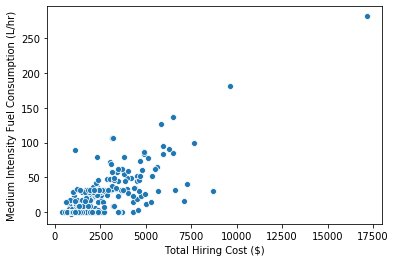

In [56]:
sns.scatterplot(x = Covered_RSMeans_CREWS['Total Hiring Cost ($)'] , y = Covered_RSMeans_CREWS['Medium Intensity Fuel Consumption (L/hr)'])

In [57]:
len(Covered_RSMeans_CREWS)

275

In [58]:
Numerical_df = Covered_RSMeans_CREWS.loc[:, 'Labour Hours':'Number of diesel Consuming Equipment']
Numerical_df = Numerical_df.set_index(Covered_RSMeans_CREWS['Crew'])
Numerical_df = Numerical_df.astype(float)
Numerical_df = Numerical_df[(np.abs(sc.stats.zscore(Numerical_df)) < 3).all(axis = 1)]
Numerical_df.head()

,Labour Hours,Total Hiring Cost ($),Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
Crew,,,,,,
Crew A-3B,16.0,1915.05,15.984207,25.875788,40.870155,2.0
Crew A-3C,8.0,805.70,6.100000,9.062500,13.950000,1.0
Crew A-3H,8.0,1168.50,20.889500,31.630500,40.900500,1.0
Crew A-3I,8.0,1245.45,20.889500,31.630500,40.900500,1.0
Crew A-3J,8.0,1739.60,12.680000,24.065000,35.240000,1.0


In [59]:
len(Numerical_df)

266

In [60]:
X = Numerical_df[['Labour Hours', 'Total Hiring Cost ($)', 'Number of diesel Consuming Equipment']].astype(float)
Y = Numerical_df['Medium Intensity Fuel Consumption (L/hr)'].astype(float)

In [61]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

In [62]:
print(est.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Medium Intensity Fuel Consumption (L/hr)   R-squared:                       0.787
Model:                                                  OLS   Adj. R-squared:                  0.785
Method:                                       Least Squares   F-statistic:                     323.5
Date:                                      Sat, 27 Jun 2020   Prob (F-statistic):           9.15e-88
Time:                                              11:19:23   Log-Likelihood:                -1009.5
No. Observations:                                       266   AIC:                             2027.
Df Residuals:                                           262   BIC:                             2041.
Df Model:                                                 3                                         
Covariance Type:                                  nonrobust                                

In [63]:
EarthWorkActivities = pd.read_excel('Earthwork-labeled.xlsx')
EarthWorkActivities = EarthWorkActivities.dropna(subset = ['Crew'])
EarthWorkActivities = EarthWorkActivities.reset_index()
EarthWorkActivities.head()

,index,Quantity,LineNumber,Line Source,SubContracted Ind.,Description,Crew,Daily Output,Labor Hours,Unit,...,Total O&P,Ext. Mat. O&P,Ext. Labor O&P,Ext. Equip. O&P,Ext. Total O&P,Labor Type,Data Release,CCI Location,Notes,Activity
0,6,0,316326130110,NaN,NaN,"Fixed end caisson piles, open style in stable ...",B43,200.0,0.24,V.L.F.,...,32.24,0,0,0,0,STD,Year 2020,National Average,NaN,Bored Piles
1,7,0,316326130200,NaN,NaN,"Fixed end caisson piles, open style in stable ...",B43,190.0,0.25,V.L.F.,...,42.16,0,0,0,0,STD,Year 2020,National Average,NaN,Bored Piles
2,8,0,316326130300,NaN,NaN,"Fixed end caisson piles, open style in stable ...",B43,150.0,0.32,V.L.F.,...,59.65,0,0,0,0,STD,Year 2020,National Average,NaN,Bored Piles
3,9,0,316326130400,NaN,NaN,"Fixed end caisson piles, open style in stable ...",B43,125.0,0.38,V.L.F.,...,78.80,0,0,0,0,STD,Year 2020,National Average,NaN,Bored Piles
4,10,0,316326130500,NaN,NaN,"Fixed end caisson piles, open style in stable ...",B43,100.0,0.48,V.L.F.,...,122.50,0,0,0,0,STD,Year 2020,National Average,NaN,Bored Piles


In [64]:
len(EarthWorkActivities)

1449

In [65]:
Covered_CREWS = [i.replace('Crew ', '').replace('-','') for i in list(Covered_RSMeans_CREWS['Crew'])]

In [66]:
Covered_CREWS[:5]

['A3B', 'A3C', 'A3H', 'A3I', 'A3J']

In [67]:
len([i for i in EarthWorkActivities['Crew'].values if i in Covered_CREWS])

985

In [68]:
Covered_EarthWorkActivities = EarthWorkActivities[[i in Covered_CREWS for i in EarthWorkActivities['Crew'].values]]
Covered_EarthWorkActivities = Covered_EarthWorkActivities.reset_index()
Covered_EarthWorkActivities.head()

,level_0,index,Quantity,LineNumber,Line Source,SubContracted Ind.,Description,Crew,Daily Output,Labor Hours,...,Total O&P,Ext. Mat. O&P,Ext. Labor O&P,Ext. Equip. O&P,Ext. Total O&P,Labor Type,Data Release,CCI Location,Notes,Activity
0,49,62,0,316326134500,NaN,NaN,"Fixed end caisson piles, load and haul excess ...",B34B,178.0,0.04,...,6.84,0,0,0,0,STD,Year 2020,National Average,NaN,Bored Piles
1,89,121,0,311110100150,NaN,NaN,"Clearing & grubbing, grub stumps and remove",B30,2.0,12.00,...,1925.00,0,0,0,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land
2,91,123,0,311110100250,NaN,NaN,"Clearing & grubbing, trees to 12"" diameter, gr...",B30,1.0,24.00,...,3875.00,0,0,0,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land
3,93,125,0,311110100350,NaN,NaN,"Clearing & grubbing, heavy stumps, to 24"" diam...",B30,0.5,48.00,...,7725.00,0,0,0,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land
4,135,180,0,310513100200,NaN,NaN,"Soils for earthwork, common borrow, spread wit...",B15,600.0,0.05,...,22.22,0,0,0,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results"


In [69]:
# # pd.options.mode.chained_assignment = None
# cleaned_Covered_EarthWorkActivities = Covered_EarthWorkActivities.copy()
# for i in range(0,len(cleaned_Covered_EarthWorkActivities)):
#     text = cleaned_Covered_EarthWorkActivities['Description'][i]
#     clean_text = text.replace('\n', ' ')             #to replace lines in tweets with space
#     clean_text = re.sub(r'[^a-zA-Z ]',' ',clean_text)     #i removes the numbers,punctuations and symbols except
#     clean_text = clean_text.lower()     #characters is lower-case 
# #     tokenized_description = word_tokenize(clean_text)
# #     clean_text=[t for t in tokenized_tweet if not t in Stop_Words1]
#     cleaned_Covered_EarthWorkActivities['Description'][i] = clean_text

In [70]:
# Vectorizer = CountVectorizer(ngram_range=(1,2)) #to vectorize the irrelevant materials into uni-grams and bi-grams
# Word_count_df = Vectorizer.fit_transform(cleaned_Covered_EarthWorkActivities['Description'])
# Vocabulary = Vectorizer.get_feature_names() #to store the uni-grams and bi-grams

In [71]:
# len(Vocabulary)

In [72]:
# sse = []
# list_k = list(range(1, 30))

# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(Word_count_df)
#     sse.append(km.inertia_)

# # Plot sse against k
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Number of clusters *k*')
# plt.ylabel('Sum of squared distance')

In [73]:
# kmeans = KMeans(n_clusters = 10, random_state=4)
# kmeans.fit(Word_count_df)
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_ # to get the labels of samples
# cleaned_Covered_EarthWorkActivities['Label'] = pd.DataFrame(labels)

In [74]:
# Counter(labels)

In [75]:
# from wordcloud import WordCloud

In [76]:
# clustered_descriptions = [' '.join(cleaned_Covered_EarthWorkActivities[cleaned_Covered_EarthWorkActivities['Label'] == i]['Description']) for i in range(10)]

In [77]:
# len(clustered_descriptions)

In [78]:
# for text in range(len(clustered_descriptions)):
#     # Create the wordcloud object
#     wordcloud= WordCloud(width=1000, height=500, max_words=50).generate(clustered_descriptions[text])
#     # Display the generated image:
#     c=plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.margins(x=0, y=0)
#     plt.title('Frequent words in activity type' + ' '+ str(text))
#     plt.show()

In [79]:
# cleaned_Covered_EarthWorkActivities.head()

In [80]:
Covered_RSMeans_CREWS.head()

,Index,Crew,Crew Equipment,Equipment Cost,Code,Labour Hours,Total Hiring Cost ($),Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
0,17,Crew A-3B,"1 Dump Truck, 12 C.Y., 400 H.P.****1 F.E. Load...","567.05****531.2****$1,915.05","14,15",16,1915.05,15.984207,25.875788,40.870155,2.0
1,18,Crew A-3C,"1 Loader, Skid Steer, 78 H.P.****8 L.H., Daily...",392.5****$805.70,16,8,805.70,6.100000,9.062500,13.950000,1.0
2,23,Crew A-3H,"1 Hyd. Crane, 12 Ton (Daily)****8 L.H., Daily ...","708.9****$1,168.50",21,8,1168.50,20.889500,31.630500,40.900500,1.0
3,24,Crew A-3I,"1 Hyd. Crane, 25 Ton (Daily)****8 L.H., Daily ...","785.85****$1,245.45",22,8,1245.45,20.889500,31.630500,40.900500,1.0
4,25,Crew A-3J,"1 Hyd. Crane, 40 Ton (Daily)****8 L.H., Daily ...","1280****$1,739.60",23,8,1739.60,12.680000,24.065000,35.240000,1.0


In [81]:
Covered_RSMeans_CREWS['Crew'] = pd.DataFrame([i.replace('Crew', '').replace(' ','').replace('-', '') for i in Covered_RSMeans_CREWS['Crew']])

In [82]:
Covered_RSMeans_CREWS.head()

,Index,Crew,Crew Equipment,Equipment Cost,Code,Labour Hours,Total Hiring Cost ($),Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
0,17,A3B,"1 Dump Truck, 12 C.Y., 400 H.P.****1 F.E. Load...","567.05****531.2****$1,915.05","14,15",16,1915.05,15.984207,25.875788,40.870155,2.0
1,18,A3C,"1 Loader, Skid Steer, 78 H.P.****8 L.H., Daily...",392.5****$805.70,16,8,805.70,6.100000,9.062500,13.950000,1.0
2,23,A3H,"1 Hyd. Crane, 12 Ton (Daily)****8 L.H., Daily ...","708.9****$1,168.50",21,8,1168.50,20.889500,31.630500,40.900500,1.0
3,24,A3I,"1 Hyd. Crane, 25 Ton (Daily)****8 L.H., Daily ...","785.85****$1,245.45",22,8,1245.45,20.889500,31.630500,40.900500,1.0
4,25,A3J,"1 Hyd. Crane, 40 Ton (Daily)****8 L.H., Daily ...","1280****$1,739.60",23,8,1739.60,12.680000,24.065000,35.240000,1.0


In [83]:
Covered_EarthWorkActivities['Low Intensity Fuel Consumption (L/hr)'] = pd.DataFrame([Covered_RSMeans_CREWS[Covered_RSMeans_CREWS['Crew'] == i ]['Low Intensity Fuel Consumption (L/hr)'].values for i in Covered_EarthWorkActivities['Crew'].values])
Covered_EarthWorkActivities['Medium Intensity Fuel Consumption (L/hr)'] = pd.DataFrame([Covered_RSMeans_CREWS[Covered_RSMeans_CREWS['Crew'] == i ]['Medium Intensity Fuel Consumption (L/hr)'].values for i in Covered_EarthWorkActivities['Crew'].values])
Covered_EarthWorkActivities['High Intensity Fuel Consumption (L/hr)'] = pd.DataFrame([Covered_RSMeans_CREWS[Covered_RSMeans_CREWS['Crew'] == i ]['High Intensity Fuel Consumption (L/hr)'].values for i in Covered_EarthWorkActivities['Crew'].values])

In [84]:
Covered_EarthWorkActivities.head()

,level_0,index,Quantity,LineNumber,Line Source,SubContracted Ind.,Description,Crew,Daily Output,Labor Hours,...,Ext. Equip. O&P,Ext. Total O&P,Labor Type,Data Release,CCI Location,Notes,Activity,Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr)
0,49,62,0,316326134500,NaN,NaN,"Fixed end caisson piles, load and haul excess ...",B34B,178.0,0.04,...,0,0,STD,Year 2020,National Average,NaN,Bored Piles,11.284207,17.095788,24.770155
1,89,121,0,311110100150,NaN,NaN,"Clearing & grubbing, grub stumps and remove",B30,2.0,12.00,...,0,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land,29.018413,49.615935,80.340310
2,91,123,0,311110100250,NaN,NaN,"Clearing & grubbing, trees to 12"" diameter, gr...",B30,1.0,24.00,...,0,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land,29.018413,49.615935,80.340310
3,93,125,0,311110100350,NaN,NaN,"Clearing & grubbing, heavy stumps, to 24"" diam...",B30,0.5,48.00,...,0,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land,29.018413,49.615935,80.340310
4,135,180,0,310513100200,NaN,NaN,"Soils for earthwork, common borrow, spread wit...",B15,600.0,0.05,...,0,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310


In [85]:
Covered_EarthWorkActivities.columns

Index(['level_0', 'index', 'Quantity', 'LineNumber', 'Line Source',
       'SubContracted Ind.', 'Description', 'Crew', 'Daily Output',
       'Labor Hours', 'Unit', 'Material', 'Labor', 'Equipment', 'Total',
       '\n\n              Ext. Mat.\n\n            ',
       '\n\n              Ext. Labor\n\n            ',
       '\n\n              Ext. Equip.\n\n            ',
       '\n\n              Ext. Total\n\n            ',
       '\n\n              Mat. O&P\n\n            ',
       '\n\n              Labor O&P\n\n            ',
       '\n\n              Equip. O&P\n\n            ',
       '\n\n              Total O&P\n\n            ',
       '\n\n              Ext. Mat. O&P\n\n            ',
       '\n\n              Ext. Labor O&P\n\n            ',
       '\n\n              Ext. Equip. O&P\n\n            ',
       '\n\n              Ext. Total O&P\n\n            ',
       '\n\n              Labor Type\n\n            ',
       '\n\n              Data Release\n\n            ',
       

In [86]:
# Covered_EarthWorkActivities.groupby('Label').mean()[['Low Intensity Fuel Consumption (L/hr)', 'Medium Intensity Fuel Consumption (L/hr)', 'High Intensity Fuel Consumption (L/hr)']]

In [87]:
# cleaned_Covered_EarthWorkActivities[cleaned_Covered_EarthWorkActivities['Label'] == 8]['Description'][966]

In [88]:
Covered_EarthWorkActivities['Description'][966]

'Selective felling trees and piling, large tract clearing & piling, firm level terrain, no boulders, softwood, per tree, 300 H.P. dozer, 36" to 48" diameter'

In [89]:
Covered_EarthWorkActivities['Crew'][966]

'B10M'

In [90]:
Covered_RSMeans_CREWS[Covered_RSMeans_CREWS['Crew'] == 'B10M']

,Index,Crew,Crew Equipment,Equipment Cost,Code,Labour Hours,Total Hiring Cost ($),Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Number of diesel Consuming Equipment
19,60,B10M,"1 Dozer, 300 H.P.****12 L.H., Daily Totals","1831****$2,436.00",76,12,2436.0,14.4,28.41,44.55,1.0


In [91]:
Covered_EarthWorkActivities['Fuel Consumption per unit of output-Medium work intensity'] = Covered_EarthWorkActivities['Medium Intensity Fuel Consumption (L/hr)']*8/Covered_EarthWorkActivities['Daily Output']       

In [92]:
Covered_EarthWorkActivities['Fuel Consumption per unit of output-Medium work intensity']

0        0.768350
1      198.463739
2      396.927477
3      793.854954
4        0.730332
5        0.730332
6        0.730332
7        0.683832
8        0.730332
9        0.730332
10       0.730332
11       0.730332
12       0.730332
13       0.730332
14       0.730332
15       0.730332
16       0.683832
17       0.071594
18       0.143188
19       0.075760
20       0.137745
21       0.098128
22       0.191350
23       0.102917
24       0.205833
25       0.113640
26       0.206618
27       0.147192
28       0.285597
29       0.190366
          ...    
955    473.500000
956    631.333333
957    437.076923
958    541.142857
959    733.161290
960      0.710250
961      2.272800
962      1.136400
963      2.841000
964      2.272800
965      4.545600
966      3.246857
967      6.493714
968      3.858674
969     12.028105
970     15.877099
971     24.807967
972     25.875788
973      0.578138
974      0.962600
975      1.283467
976      1.604333
977      1.381478
978      3.419158
979     30

In [93]:
Covered_EarthWorkActivities['Unit'].unique()

array(['L.C.Y.', 'Acre', 'C.Y.', 'S.Y.', 'L.F.', 'B.C.Y.', 'SF Wall',
       'Day', 'C.F.', 'SFCA', 'V.L.F.', 'E.C.Y.', 'S.F.', 'Hr.', 'Ea.',
       'M.S.F.', 'Ton'], dtype=object)

In [94]:
perCubicYardSoilHandlinngActivities = Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit']=='C.Y.'][['Description', 'Crew','Activity', 'Fuel Consumption per unit of output-Medium work intensity']]
perCubicYardSoilHandlinngActivities = perCubicYardSoilHandlinngActivities.reset_index()

In [95]:
perCubicYardSoilHandlinngActivities

,index,Description,Crew,Activity,Fuel Consumption per unit of output-Medium work intensity
0,4,"Soils for earthwork, common borrow, spread wit...",B15,"Earthwork, common work results",0.730332
1,5,"Soils for earthwork, screened loam borrow, spr...",B15,"Earthwork, common work results",0.730332
2,6,"Soils for earthwork, topsoil borrow, weed free...",B15,"Earthwork, common work results",0.730332
3,7,"Soils for earthwork, borrow, spread with 200 H...",B34B,"Earthwork, common work results",0.683832
4,17,"Topsoil stripping and stockpiling, topsoil, sa...",B10B,Earth stripping and stockpiling,0.071594
5,18,"Topsoil stripping and stockpiling, topsoil, sa...",B10B,Earth stripping and stockpiling,0.143188
6,19,"Topsoil stripping and stockpiling, topsoil, sa...",B10M,Earth stripping and stockpiling,0.075760
7,20,"Topsoil stripping and stockpiling, topsoil, sa...",B10M,Earth stripping and stockpiling,0.137745
8,21,"Topsoil stripping and stockpiling, topsoil, sa...",B10X,Earth stripping and stockpiling,0.098128
9,22,"Topsoil stripping and stockpiling, topsoil, sa...",B10X,Earth stripping and stockpiling,0.191350


In [96]:
perCubicYardSoilHandlinngActivities.loc[0][1]

'Soils for earthwork, common borrow, spread with 200 HP dozer, includes load at pit and haul, 2 miles round trip, excludes compaction'

In [97]:
perCubicYardSoilHandlinngActivities.loc[3][1]

'Soils for earthwork, borrow, spread with 200 HP dozer, includes load at pit and haul, round trip, excludes compaction, for 5 mile haul, add'

In [98]:
perAcreSoilHandlinngActivities = Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit']=='Acre'][['Description', 'Crew','Activity', 'Fuel Consumption per unit of output-Medium work intensity']]
perAcreSoilHandlinngActivities = perAcreSoilHandlinngActivities.reset_index()

In [99]:
perAcreSoilHandlinngActivities

,index,Description,Crew,Activity,Fuel Consumption per unit of output-Medium work intensity
0,1,"Clearing & grubbing, grub stumps and remove",B30,Clearing and grubbing land,198.463739
1,2,"Clearing & grubbing, trees to 12"" diameter, gr...",B30,Clearing and grubbing land,396.927477
2,3,"Clearing & grubbing, heavy stumps, to 24"" diam...",B30,Clearing and grubbing land,793.854954
3,946,"Selective clearing, brush, light clearing, wit...",B11A,Selective tree and shrub removal and trimming,82.333333
4,947,"Selective clearing, brush, medium clearing, wi...",B11A,Selective tree and shrub removal and trimming,109.777778
5,948,"Selective tree and shrub removal, selective cl...",B11A,Selective tree and shrub removal and trimming,16.466667
6,949,"Selective tree and shrub removal, selective cl...",B11A,Selective tree and shrub removal and trimming,20.583333
7,950,"Selective tree and shrub removal, selective cl...",B11A,Selective tree and shrub removal and trimming,25.729167
8,951,"Selective tree and shrub removal, selective fe...",B10M,Selective tree and shrub removal and trimming,303.040000
9,952,"Selective tree and shrub removal, selective fe...",B10M,Selective tree and shrub removal and trimming,378.800000


In [100]:
perAcreSoilHandlinngActivities.loc[0][1]

'Clearing & grubbing, grub stumps and remove'

In [101]:
perAcreSoilHandlinngActivities.loc[8][1]

'Selective tree and shrub removal, selective felling & piling, large tract, firm level terrain, no boulders, 300 H.P. dozer, up to 400 trees per acre, up to 25% hardwoods, less than 12" diameter trees, with tractor'

In [102]:
Covered_EarthWorkActivities.head()

,level_0,index,Quantity,LineNumber,Line Source,SubContracted Ind.,Description,Crew,Daily Output,Labor Hours,...,Ext. Total O&P,Labor Type,Data Release,CCI Location,Notes,Activity,Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Fuel Consumption per unit of output-Medium work intensity
0,49,62,0,316326134500,NaN,NaN,"Fixed end caisson piles, load and haul excess ...",B34B,178.0,0.04,...,0,STD,Year 2020,National Average,NaN,Bored Piles,11.284207,17.095788,24.770155,0.768350
1,89,121,0,311110100150,NaN,NaN,"Clearing & grubbing, grub stumps and remove",B30,2.0,12.00,...,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land,29.018413,49.615935,80.340310,198.463739
2,91,123,0,311110100250,NaN,NaN,"Clearing & grubbing, trees to 12"" diameter, gr...",B30,1.0,24.00,...,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land,29.018413,49.615935,80.340310,396.927477
3,93,125,0,311110100350,NaN,NaN,"Clearing & grubbing, heavy stumps, to 24"" diam...",B30,0.5,48.00,...,0,STD,Year 2020,National Average,NaN,Clearing and grubbing land,29.018413,49.615935,80.340310,793.854954
4,135,180,0,310513100200,NaN,NaN,"Soils for earthwork, common borrow, spread wit...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332


In [103]:
Counter(Covered_EarthWorkActivities['Unit'])

Counter({'L.C.Y.': 542,
         'Acre': 17,
         'C.Y.': 29,
         'S.Y.': 21,
         'L.F.': 7,
         'B.C.Y.': 291,
         'SF Wall': 1,
         'Day': 1,
         'C.F.': 3,
         'SFCA': 1,
         'V.L.F.': 3,
         'E.C.Y.': 16,
         'S.F.': 6,
         'Hr.': 7,
         'Ea.': 36,
         'M.S.F.': 1,
         'Ton': 3})

In [104]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'Acre']['Description']

1            Clearing & grubbing, grub stumps and remove
2      Clearing & grubbing, trees to 12" diameter, gr...
3      Clearing & grubbing, heavy stumps, to 24" diam...
946    Selective clearing, brush, light clearing, wit...
947    Selective clearing, brush, medium clearing, wi...
948    Selective tree and shrub removal, selective cl...
949    Selective tree and shrub removal, selective cl...
950    Selective tree and shrub removal, selective cl...
951    Selective tree and shrub removal, selective fe...
952    Selective tree and shrub removal, selective fe...
953    Selective tree and shrub removal, selective fe...
954    Selective tree and shrub removal, selective fe...
955    Selective tree and shrub removal, selective fe...
956    Selective tree and shrub removal, selective fe...
957    Selective tree and shrub removal, selective fe...
958    Selective tree and shrub removal, selective fe...
959    Selective tree and shrub removal, selective fe...
Name: Description, dtype: objec

In [105]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'L.C.Y.']

,level_0,index,Quantity,LineNumber,Line Source,SubContracted Ind.,Description,Crew,Daily Output,Labor Hours,...,Ext. Total O&P,Labor Type,Data Release,CCI Location,Notes,Activity,Low Intensity Fuel Consumption (L/hr),Medium Intensity Fuel Consumption (L/hr),High Intensity Fuel Consumption (L/hr),Fuel Consumption per unit of output-Medium work intensity
0,49,62,0,316326134500,NaN,NaN,"Fixed end caisson piles, load and haul excess ...",B34B,178.0,0.04,...,0,STD,Year 2020,National Average,NaN,Bored Piles,11.284207,17.095788,24.770155,0.768350
8,139,187,0,310516100100,NaN,NaN,"Aggregate for earthwork, bank run gravel, spre...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
9,140,188,0,310516100300,NaN,NaN,"Aggregate for earthwork, crushed stone, 1.40 t...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
10,141,189,0,310516100320,NaN,NaN,"Aggregate for earthwork, crushed stone, 1.40 t...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
11,142,190,0,310516100340,NaN,NaN,"Aggregate for earthwork, crushed stone, 1.40 t...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
12,143,191,0,310516100360,NaN,NaN,"Aggregate for earthwork, crushed stone, 1.40 t...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
13,144,192,0,310516100400,NaN,NaN,"Aggregate for earthwork, sand, washed, for con...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
14,145,193,0,310516100500,NaN,NaN,"Aggregate for earthwork, dead or bank sand, sp...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
15,146,194,0,310516100600,NaN,NaN,"Aggregate for earthwork, select structural fil...",B15,600.0,0.05,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",32.668413,54.774909,87.540310,0.730332
16,147,195,0,310516100900,NaN,NaN,"Aggregate for earthwork, aggregate or sand, sp...",B34B,200.0,0.04,...,0,STD,Year 2020,National Average,NaN,"Earthwork, common work results",11.284207,17.095788,24.770155,0.683832


In [106]:
Covered_EarthWorkActivities['Fuel Consumption per unit of output-Medium work intensity'] = pd.DataFrame([p if p>0 else 0 for p in Covered_EarthWorkActivities['Fuel Consumption per unit of output-Medium work intensity']])

In [107]:
len(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'L.C.Y.'])

542

In [108]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'L.C.Y.']['Fuel Consumption per unit of output-Medium work intensity'].mean()

2.065633221792998

In [109]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'L.C.Y.']['Fuel Consumption per unit of output-Medium work intensity'].describe()

count    542.000000
mean       2.065633
std        1.848157
min        0.000000
25%        0.814085
50%        1.315089
75%        2.838175
max        9.933611
Name: Fuel Consumption per unit of output-Medium work intensity, dtype: float64

In [110]:
print(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'L.C.Y.']['Description'])

0      Fixed end caisson piles, load and haul excess ...
8      Aggregate for earthwork, bank run gravel, spre...
9      Aggregate for earthwork, crushed stone, 1.40 t...
10     Aggregate for earthwork, crushed stone, 1.40 t...
11     Aggregate for earthwork, crushed stone, 1.40 t...
12     Aggregate for earthwork, crushed stone, 1.40 t...
13     Aggregate for earthwork, sand, washed, for con...
14     Aggregate for earthwork, dead or bank sand, sp...
15     Aggregate for earthwork, select structural fil...
16     Aggregate for earthwork, aggregate or sand, sp...
75     Excavating, trench backfill, 1 C.Y. bucket, mi...
76     Excavating, trench backfill, 1 C.Y. bucket, 10...
77     Excavating, trench backfill, 2-1/4 C.Y. bucket...
78     Excavating, trench backfill, 2-1/4 C.Y. bucket...
358    Backfill, bulk, up to 300' haul, dozer backfil...
362    Backfill, trench, up to 300' haul, dozer backf...
366    Backfill, in 8" layers, spreading, small dozer...
367    Backfill, structural, co

In [111]:
Covered_EarthWorkActivities['Crew'].unique()

array(['B34B', 'B30', 'B15', 'B10B', 'B10M', 'B10X', 'B1', 'B62', 'B63',
       'B11C', 'B11M', 'B12Q', 'B12F', 'B12A', 'B12B', 'B12S', 'B13G',
       'B13D', 'B13E', 'B13J', 'B6', 'B10R', 'B10T', 'B12E', 'B12C',
       'B10O', 'B9', 'B12D', 'B12G', 'B12H', 'B12I', 'B12P', 'B10N',
       'B10P', 'B10Q', 'B10S', 'B10U', 'B12L', 'B12M', 'B12N', 'B12O',
       'B12T', 'B10L', 'B10W', 'B10V', 'B33F', 'B33D', 'B33E', 'B33B',
       'B33C', 'B10A', 'B9D', 'B11B', 'B10C', 'B10D', 'B37', 'B34A',
       'B34C', 'B34I', 'B34D', 'B10E', 'B10F', 'B10G', 'B13', 'B11L',
       'B11A', 'B17', 'A3B', 'C7', 'B52'], dtype=object)

In [112]:
len(Covered_EarthWorkActivities['Crew'].unique())

70

In [113]:
len(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Medium Intensity Fuel Consumption (L/hr)']!=0])

977

In [114]:
len(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Medium Intensity Fuel Consumption (L/hr)']!=0]['Crew'].unique())

69

In [115]:
len(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Crew']=='B30'])

6

In [116]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Crew']=='B30'][['Unit', 'Description', 'Medium Intensity Fuel Consumption (L/hr)', 'Fuel Consumption per unit of output-Medium work intensity']]

,Unit,Description,Medium Intensity Fuel Consumption (L/hr),Fuel Consumption per unit of output-Medium work intensity
1,Acre,"Clearing & grubbing, grub stumps and remove",49.615935,198.463739
2,Acre,"Clearing & grubbing, trees to 12"" diameter, gr...",49.615935,396.927477
3,Acre,"Clearing & grubbing, heavy stumps, to 24"" diam...",49.615935,793.854954
969,Ea.,"Selective clearing and grubbing, 1-1/2 C.Y. ex...",49.615935,12.028105
970,Ea.,"Selective clearing and grubbing, 1-1/2 C.Y. ex...",49.615935,15.877099
971,Ea.,"Selective clearing and grubbing, 1-1/2 C.Y. ex...",49.615935,24.807967


In [117]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Crew']=='B30']['Daily Output'].values

array([ 2. ,  1. ,  0.5, 33. , 25. , 16. ])

In [118]:
Covered_EarthWorkActivities.columns

Index(['level_0', 'index', 'Quantity', 'LineNumber', 'Line Source',
       'SubContracted Ind.', 'Description', 'Crew', 'Daily Output',
       'Labor Hours', 'Unit', 'Material', 'Labor', 'Equipment', 'Total',
       '\n\n              Ext. Mat.\n\n            ',
       '\n\n              Ext. Labor\n\n            ',
       '\n\n              Ext. Equip.\n\n            ',
       '\n\n              Ext. Total\n\n            ',
       '\n\n              Mat. O&P\n\n            ',
       '\n\n              Labor O&P\n\n            ',
       '\n\n              Equip. O&P\n\n            ',
       '\n\n              Total O&P\n\n            ',
       '\n\n              Ext. Mat. O&P\n\n            ',
       '\n\n              Ext. Labor O&P\n\n            ',
       '\n\n              Ext. Equip. O&P\n\n            ',
       '\n\n              Ext. Total O&P\n\n            ',
       '\n\n              Labor Type\n\n            ',
       '\n\n              Data Release\n\n            ',
       

In [119]:
Covered_EarthWorkActivities['Activity'].unique()

array(['Bored Piles', 'Clearing and grubbing land',
       'Earthwork, common work results',
       'Earth stripping and stockpiling',
       'Erosion and sedimentation controls', 'Excavation and Dewatering',
       'Fill', 'Gabions', 'Grading', 'Needle beams', 'Riprap',
       'Selective tree and shrub removal and trimming', 'Slurry walls',
       'Underpinning'], dtype=object)

In [120]:
len(Covered_EarthWorkActivities['Activity'].unique())

14

In [121]:
Counter(Covered_EarthWorkActivities['Unit'])

Counter({'L.C.Y.': 542,
         'Acre': 17,
         'C.Y.': 29,
         'S.Y.': 21,
         'L.F.': 7,
         'B.C.Y.': 291,
         'SF Wall': 1,
         'Day': 1,
         'C.F.': 3,
         'SFCA': 1,
         'V.L.F.': 3,
         'E.C.Y.': 16,
         'S.F.': 6,
         'Hr.': 7,
         'Ea.': 36,
         'M.S.F.': 1,
         'Ton': 3})

In [122]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'L.C.Y.']['Activity'])

Counter({'Bored Piles': 1,
         'Earthwork, common work results': 9,
         'Excavation and Dewatering': 4,
         'Fill': 527,
         'Riprap': 1})

In [123]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'Acre']['Activity'])

Counter({'Clearing and grubbing land': 3,
         'Selective tree and shrub removal and trimming': 14})

In [124]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'C.Y.']['Activity'])

Counter({'Earthwork, common work results': 4,
         'Earth stripping and stockpiling': 15,
         'Excavation and Dewatering': 2,
         'Slurry walls': 2,
         'Underpinning': 6})

In [125]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'S.Y.']['Activity'])

Counter({'Earth stripping and stockpiling': 7,
         'Erosion and sedimentation controls': 4,
         'Gabions': 5,
         'Grading': 3,
         'Riprap': 2})

In [126]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'L.F.']['Activity'])

Counter({'Erosion and sedimentation controls': 1,
         'Excavation and Dewatering': 6})

In [127]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'B.C.Y.']['Activity'])

Counter({'Excavation and Dewatering': 291})

In [128]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'E.C.Y.']['Activity'])

Counter({'Fill': 16})

In [129]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'] == 'Ea.']['Activity'])

Counter({'Grading': 16,
         'Needle beams': 7,
         'Selective tree and shrub removal and trimming': 13})

In [130]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Riprap']['Unit']

940    L.C.Y.
941      S.Y.
942      S.Y.
943       Ton
944       Ton
945       Ton
Name: Unit, dtype: object

In [131]:
Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Riprap']['Description'].values

array(['Rip-rap and rock lining, random, broken stone, machine placed for slope protection',
       'Rip-rap and rock lining, random, broken stone, 3/8 to 1/4 C.Y. pieces, machine placed for slope protection, grouted',
       'Rip-rap and rock lining, random, broken stone, 18" minimum thickness, machine placed for slope protection, not grouted',
       'Rip-rap and rock lining, random, broken stone, 50 lb. average, dumped',
       'Rip-rap and rock lining, random, broken stone, 100 lb. average, dumped',
       'Rip-rap and rock lining, random, broken stone, 300 lb. average, dumped'],
      dtype=object)

In [132]:
Covered_EarthWorkActivities['Activity'].unique()

array(['Bored Piles', 'Clearing and grubbing land',
       'Earthwork, common work results',
       'Earth stripping and stockpiling',
       'Erosion and sedimentation controls', 'Excavation and Dewatering',
       'Fill', 'Gabions', 'Grading', 'Needle beams', 'Riprap',
       'Selective tree and shrub removal and trimming', 'Slurry walls',
       'Underpinning'], dtype=object)

In [133]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Bored Piles']['Unit'])

Counter({'L.C.Y.': 1})

In [134]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Clearing and grubbing land']['Unit'])

Counter({'Acre': 3})

In [135]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Earthwork, common work results']['Unit'])

Counter({'C.Y.': 4, 'L.C.Y.': 9})

In [136]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Clearing and grubbing land']['Unit'])

Counter({'Acre': 3})

In [137]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Earth stripping and stockpiling']['Unit'])

Counter({'C.Y.': 15, 'S.Y.': 7})

In [138]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Erosion and sedimentation controls']['Unit'])

Counter({'S.Y.': 4, 'L.F.': 1})

In [139]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Excavation and Dewatering']['Unit'])

Counter({'B.C.Y.': 291,
         'SF Wall': 1,
         'L.C.Y.': 4,
         'Day': 1,
         'C.Y.': 2,
         'L.F.': 6,
         'C.F.': 1,
         'SFCA': 1,
         'V.L.F.': 3})

In [140]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Fill']['Unit'])

Counter({'E.C.Y.': 16, 'L.C.Y.': 527, 'S.F.': 4, 'Hr.': 7})

In [141]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Gabions']['Unit'])

Counter({'S.Y.': 5})

In [142]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Needle beams']['Unit'])

Counter({'Ea.': 7})

In [143]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Riprap']['Unit'])

Counter({'L.C.Y.': 1, 'S.Y.': 2, 'Ton': 3})

In [144]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Selective tree and shrub removal and trimming']['Unit'])

Counter({'Acre': 14, 'Ea.': 13})

In [145]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Slurry walls']['Unit'])

Counter({'C.F.': 2, 'S.F.': 2, 'C.Y.': 2})

In [146]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Activity'] == 'Underpinning']['Unit'])

Counter({'C.Y.': 6})

In [147]:
CYs = ['C.Y.', 'B.C.Y.', 'L.C.Y.']

In [148]:
Counter(Covered_EarthWorkActivities['Unit'].isin(CYs))

Counter({True: 862, False: 123})

In [149]:
Counter(Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'].isin(CYs)]['Activity'])

Counter({'Bored Piles': 1,
         'Earthwork, common work results': 13,
         'Earth stripping and stockpiling': 15,
         'Excavation and Dewatering': 297,
         'Fill': 527,
         'Riprap': 1,
         'Slurry walls': 2,
         'Underpinning': 6})

In [150]:
activitsBYCY = Covered_EarthWorkActivities[Covered_EarthWorkActivities['Unit'].isin(CYs)]

In [151]:
# activitsBYCY.to_excel('CYActivities.xlsx')

In [154]:
# Covered_EarthWorkActivities.to_excel('AllCoveredEA.xlsx')

In [163]:
X1 = Numerical_df[['Labour Hours', 'Total Hiring Cost ($)', 'Number of diesel Consuming Equipment']].astype(float)
Y1 = Numerical_df['Medium Intensity Fuel Consumption (L/hr)'].astype(float)
# X3 = sm.add_constant(X)
model = sm.OLS(Y1, X1)
est = model.fit()
print(est.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Medium Intensity Fuel Consumption (L/hr)   R-squared (uncentered):                   0.877
Model:                                                  OLS   Adj. R-squared (uncentered):              0.876
Method:                                       Least Squares   F-statistic:                              624.7
Date:                                      Sat, 27 Jun 2020   Prob (F-statistic):                   2.73e-119
Time:                                              19:36:57   Log-Likelihood:                         -1011.2
No. Observations:                                       266   AIC:                                      2028.
Df Residuals:                                           263   BIC:                                      2039.
Df Model:                                                 3                                                  
Covariance

In [161]:
X1 = Numerical_df[['Labour Hours', 'Total Hiring Cost ($)']].astype(float)
Y1 = Numerical_df['Medium Intensity Fuel Consumption (L/hr)'].astype(float)
# X3 = sm.add_constant(X1)
model2 = sm.OLS(Y1, X1, hasconst = False)
est2 = model2.fit(hasconst = False)
print(est2.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Medium Intensity Fuel Consumption (L/hr)   R-squared (uncentered):                   0.832
Model:                                                  OLS   Adj. R-squared (uncentered):              0.831
Method:                                       Least Squares   F-statistic:                              654.4
Date:                                      Sat, 27 Jun 2020   Prob (F-statistic):                   4.89e-103
Time:                                              19:35:18   Log-Likelihood:                         -1052.4
No. Observations:                                       266   AIC:                                      2109.
Df Residuals:                                           264   BIC:                                      2116.
Df Model:                                                 2                                                  
Covariance